<AxesSubplot:xlabel='displ', ylabel='hwy'>

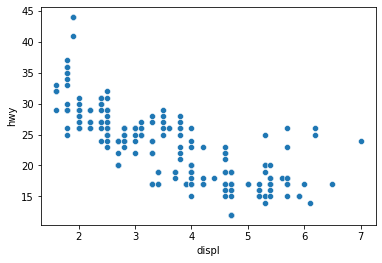

In [1]:
# 그래프 만들기
# x축과 y축에 점으로 표현한 그래프를 산점도(scatter plot)이라함.

import pandas as pd
mpg = pd.read_csv('mpg.csv')

# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x='displ',y='hwy')



[(3.0, 6.0)]

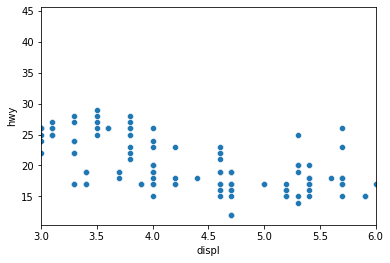

In [2]:
#x축 범위를 3-6으로 제한
sns.scatterplot(data=mpg, x='displ',y='hwy').set(xlim=(3,6))

[(3.0, 6.0), (10.0, 30.0)]

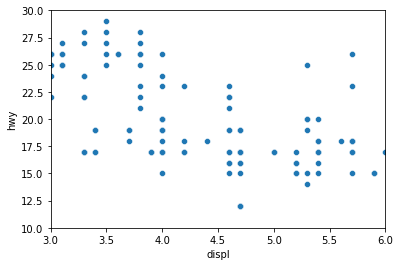

In [3]:
#Y축도 범위 10-30으로 제한
sns.scatterplot(data = mpg, x = 'displ',y='hwy').set(xlim=(3,6), ylim=(10,30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

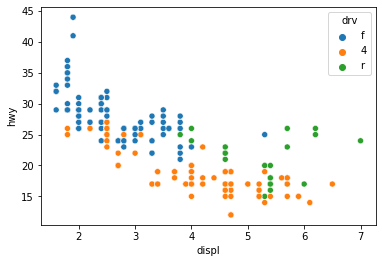

In [4]:
# 표식(marker)의 색 바꾸기
sns.scatterplot(data=mpg, x='displ',y='hwy',hue='drv')

In [5]:
# 그래프 설정 바꾸기 + 한국어 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi':'150', 'figure.figsize':[8,6],'font.size':'15','font.family':'AppleGothic'})

<AxesSubplot:xlabel='cty', ylabel='hwy'>

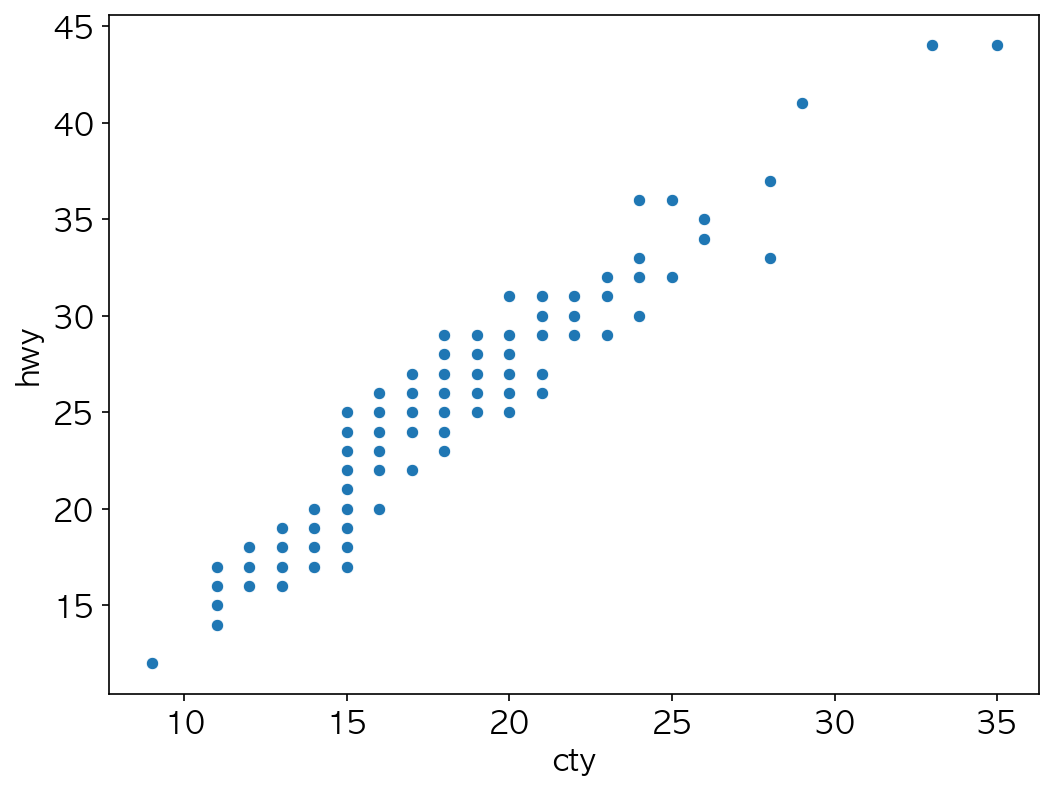

In [6]:
#204페이지
sns.scatterplot(data=mpg, x='cty',y='hwy')

[(0.0, 500000.0), (0.0, 10000.0)]

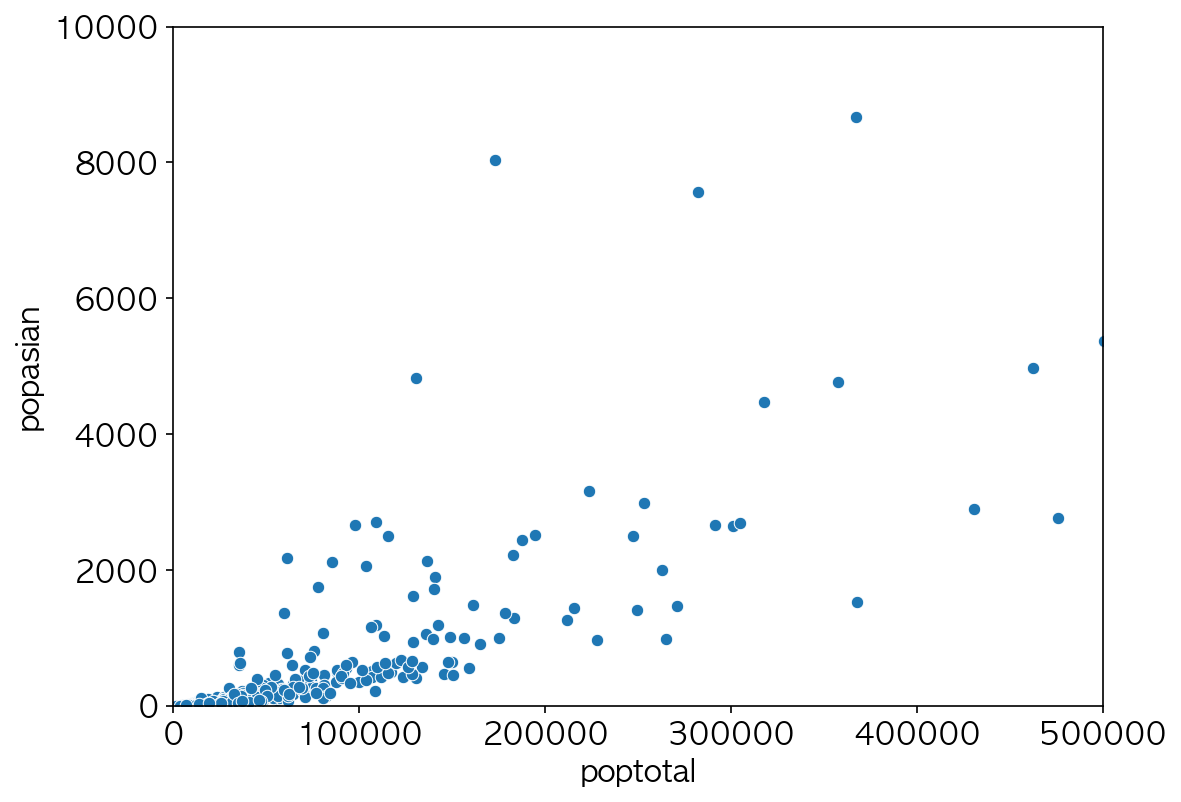

In [10]:

midwest = pd.read_csv('midwest.csv')
sns.scatterplot(data=midwest, x='poptotal',y='popasian').set(xlim=(0,500000), ylim=(0,10000))

In [15]:
#막대 그래프 bar chart 만들기
#집단별 평균표 만들기
#agg : 빈도 구하기
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy','mean'))
df_mpg


,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [18]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy = ('hwy','mean'))
df_mpg
## as_index=false를 하지 않으면 drv가 인덱스로 바뀌어서 그래프로 만들기 어려움

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

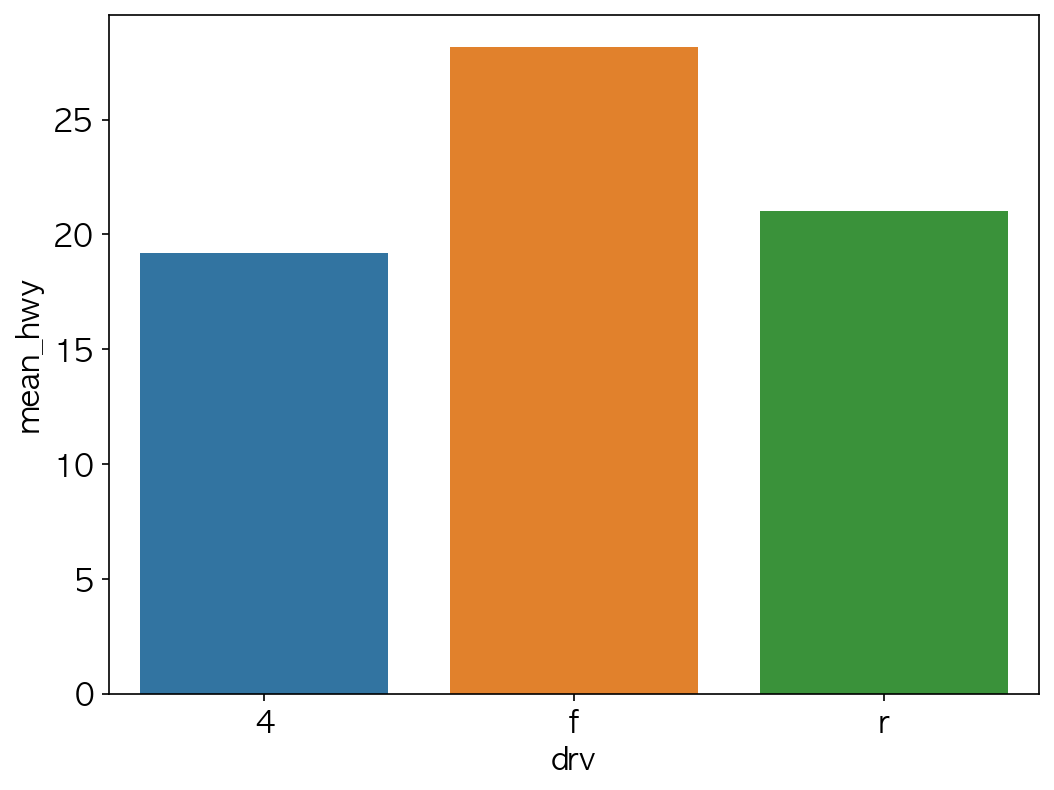

In [19]:

sns.barplot(data=df_mpg, x='drv',y='mean_hwy')

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

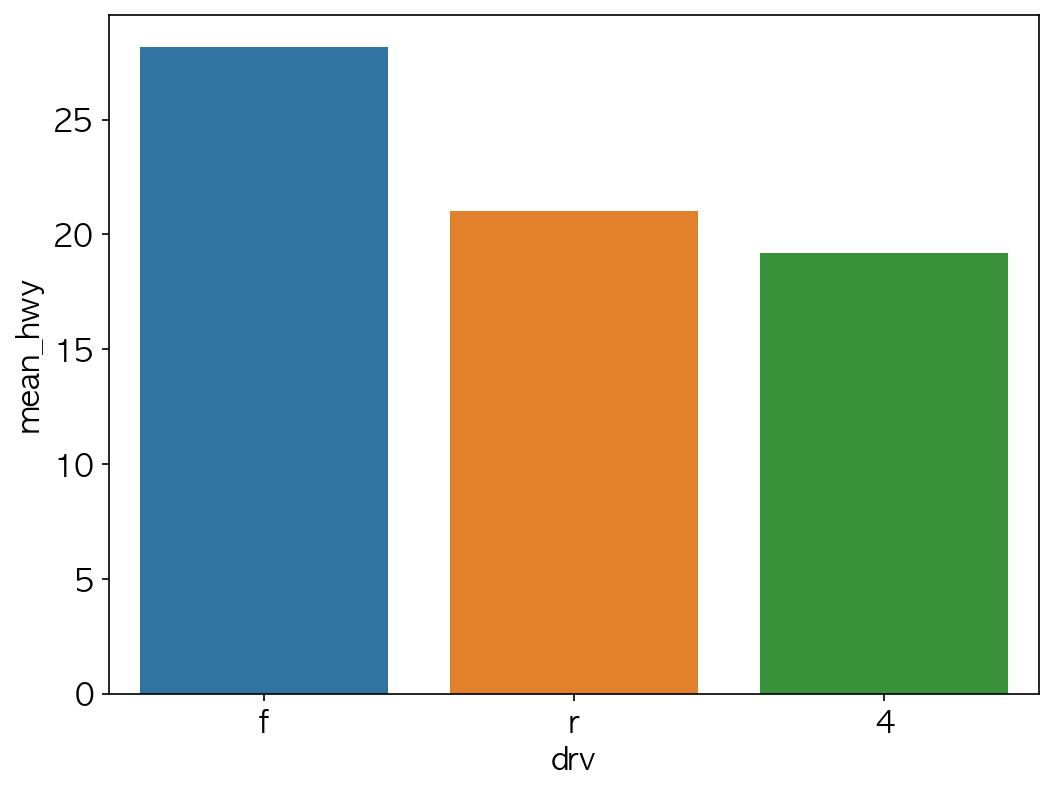

In [20]:
#데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)

#막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y='mean_hwy')

In [21]:
df_mpg = mpg.groupby('drv',as_index=False).agg(n=('drv','count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='n'>

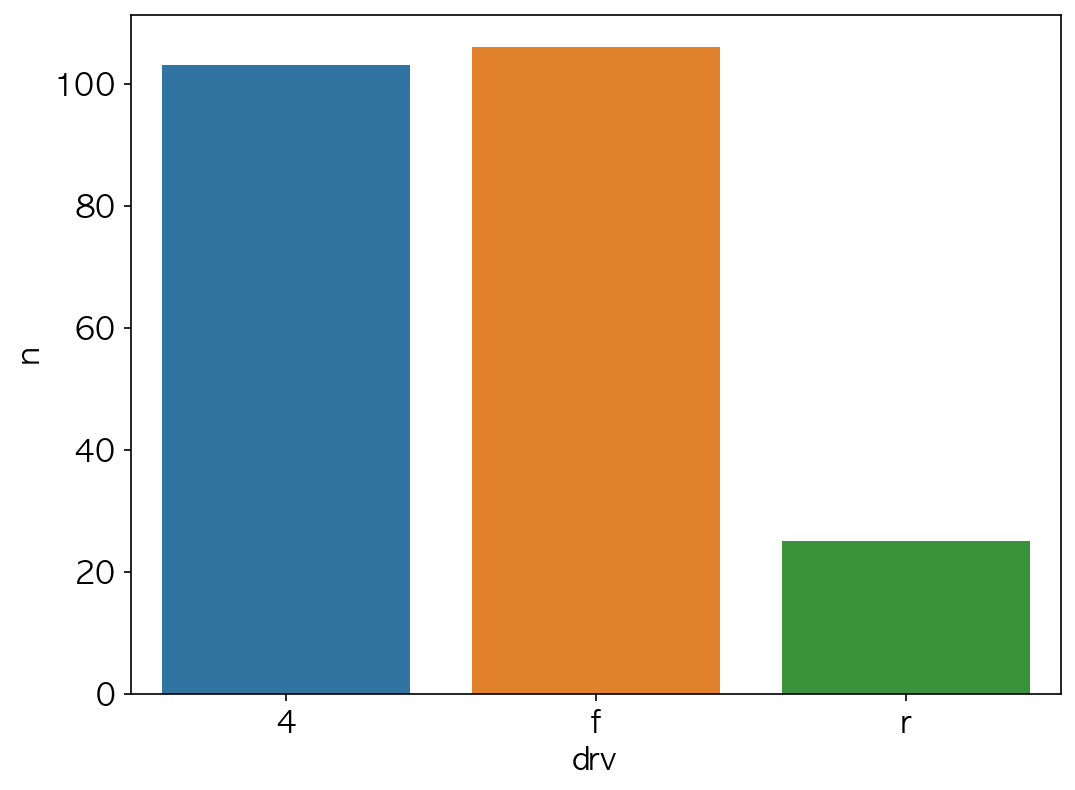

In [22]:
sns.barplot(data=df_mpg, x= 'drv',y='n')

<AxesSubplot:xlabel='drv', ylabel='count'>

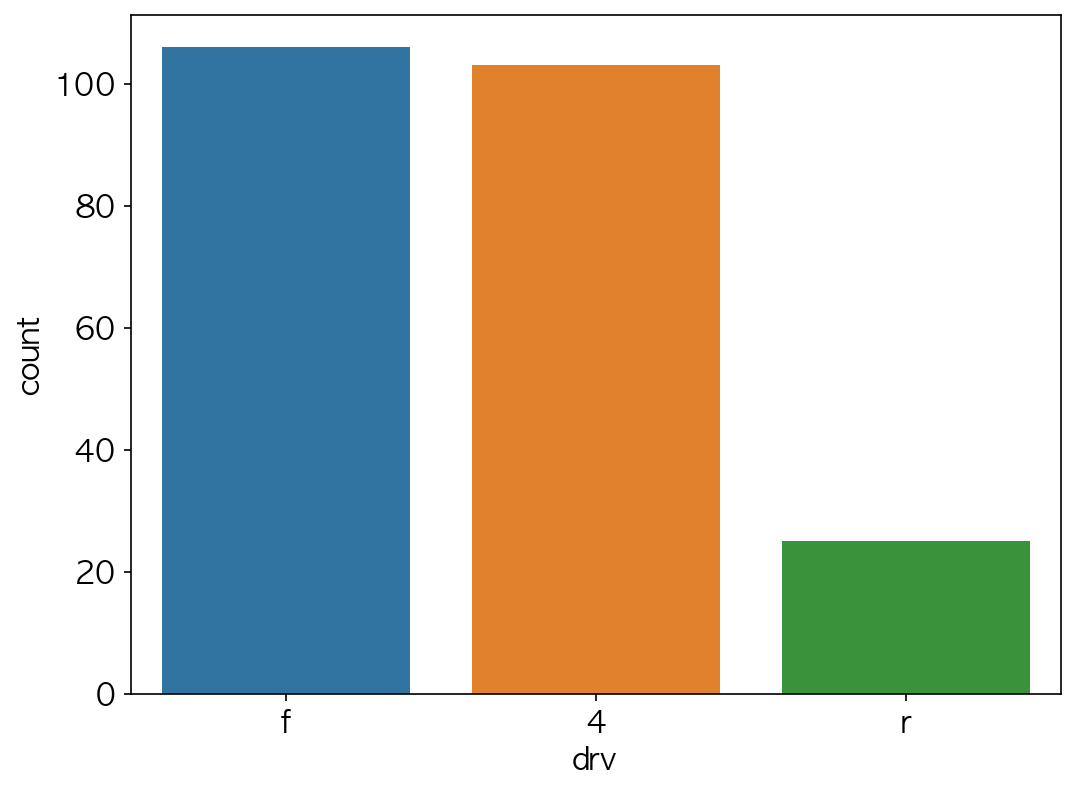

In [23]:
#빈도 막대 그래프 만들기
#데이터프레임을 건들일필요없음 바로 만들어짐
sns.countplot(data=mpg, x='drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

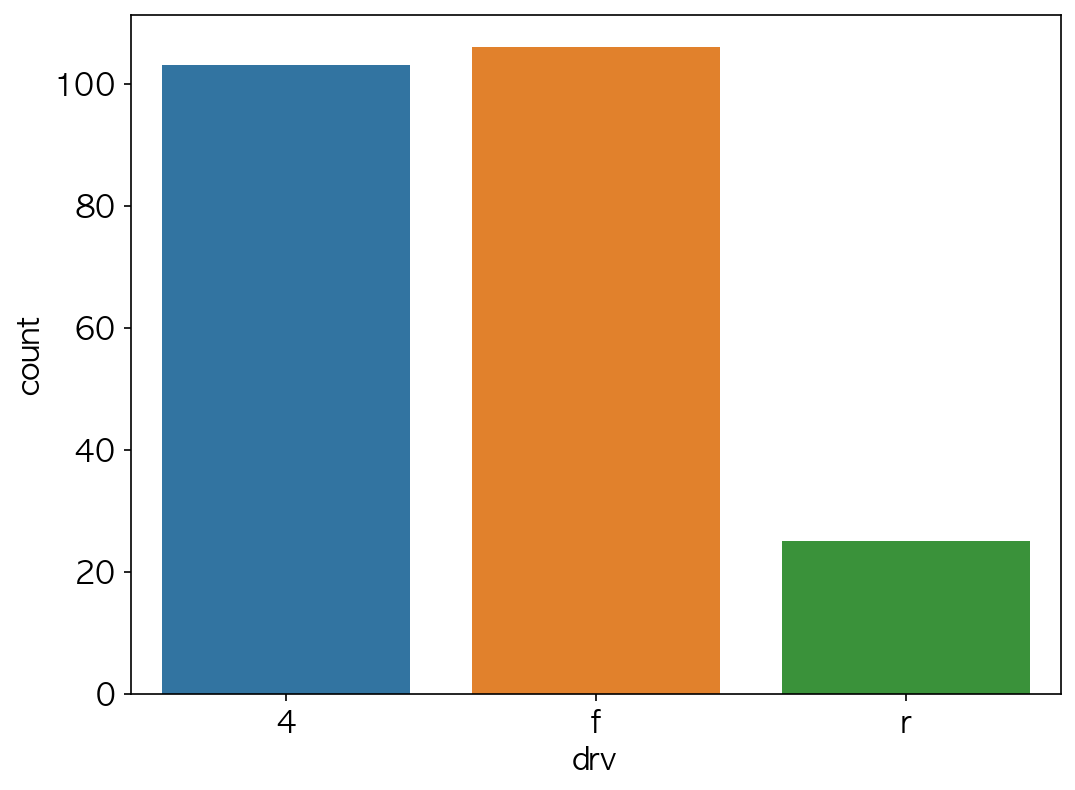

In [24]:
#임의의 순서대로 정렬하기
sns.countplot(data=mpg, x='drv',order=['4','f','r'])

In [25]:
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

<AxesSubplot:xlabel='drv', ylabel='count'>

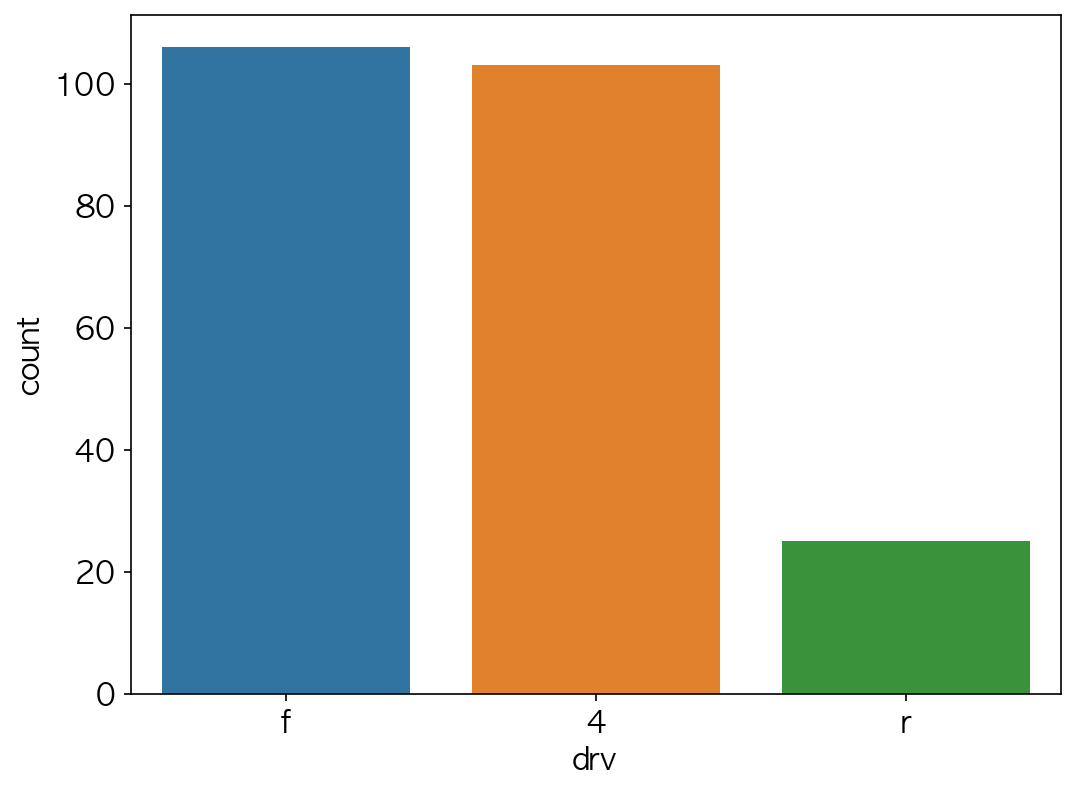

In [26]:
#drv빈도 높은순으로 정렬
sns.countplot(data=mpg,x='drv',order=mpg['drv'].value_counts().index)

In [44]:
df_mpg = mpg.query('category=="suv"')

df_mpg = df_mpg.groupby('manufacturer',as_index=False).agg(mean_cty = ('cty','mean')).sort_values(by='mean_cty',ascending=False).head(5)
df_mpg

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

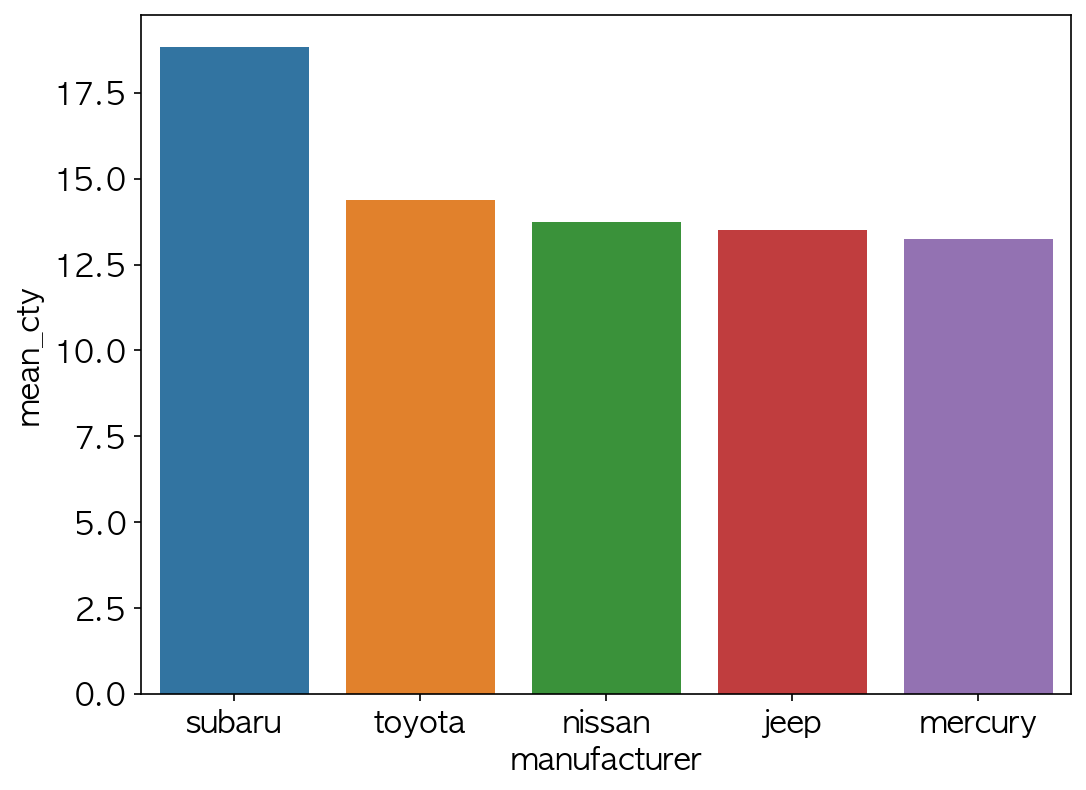

In [47]:
sns.barplot(data=df_mpg, x='manufacturer',y='mean_cty')

In [64]:
category_mpg = mpg.groupby('category',as_index=False).agg(count_category=('category','count')).sort_values(by='count_category',ascending=False)
category_mpg

,category,count_category
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<AxesSubplot:xlabel='category', ylabel='count_category'>

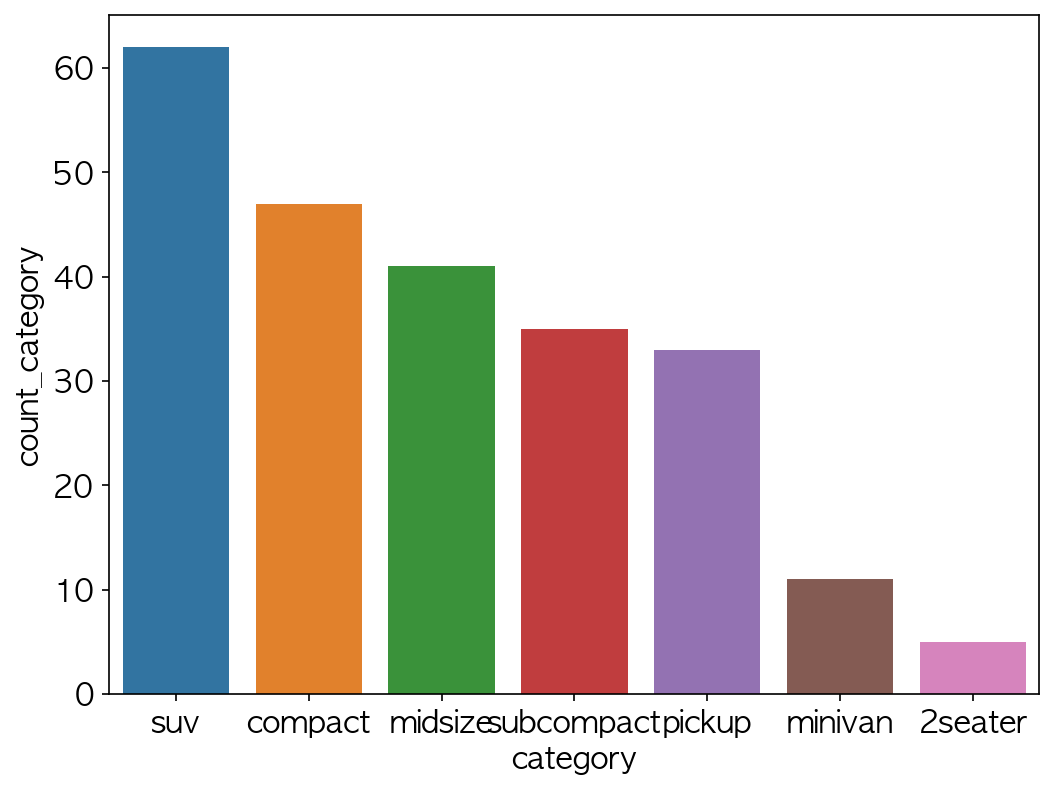

In [66]:
sns.barplot(data=category_mpg,x='category',y='count_category')

In [68]:
# 선 그래프(line graph) - 시간에 따라 달라지는 데이터 표현하기
#시계열 데이터(time series data) : 일정 시간 간격을 두고 나열된 데이터(ex.일별 환율)
#시계열 그래프( time series chart)

economics= pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<AxesSubplot:xlabel='date', ylabel='unemploy'>

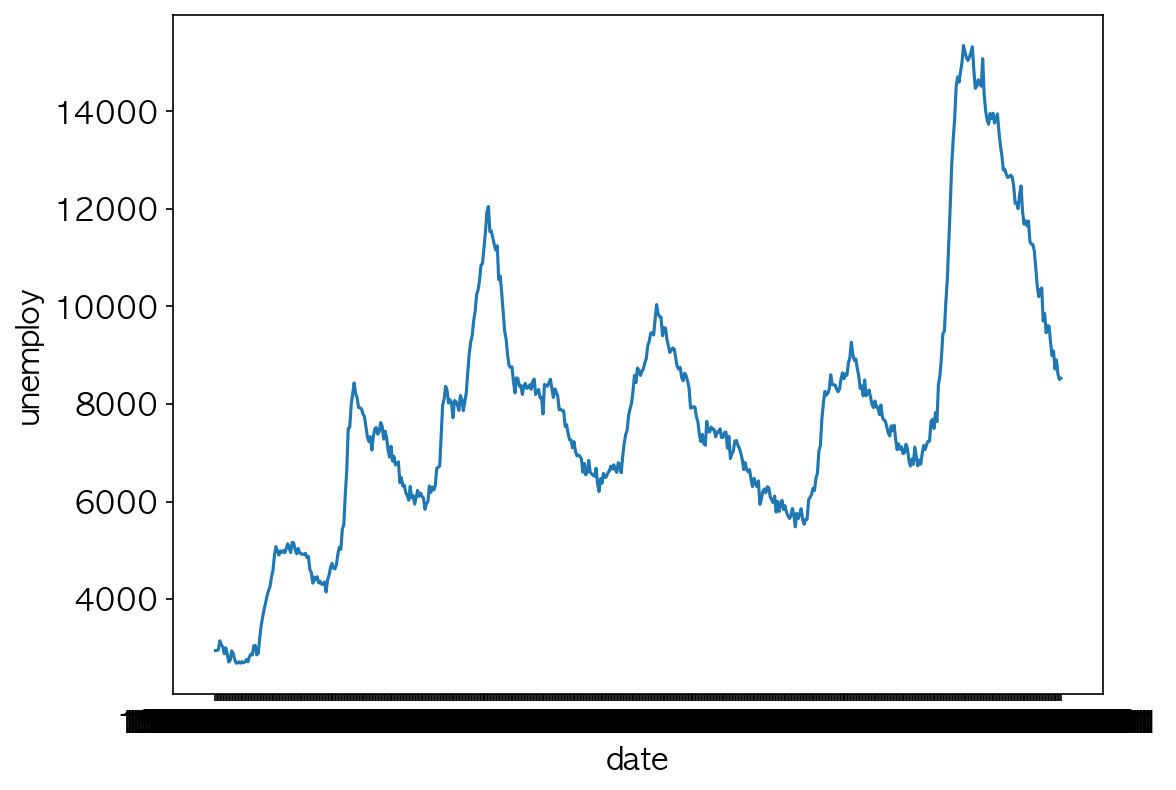

In [69]:
# sns.lineplot()을 이용하여 선 그래프 만들기
# x축에는 시간을 나타낸 date, y축에는 실업자수를 나타낸 unemploy를 지정
sns.lineplot(data=economics, x='date',y='unemploy')

In [70]:
#날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [71]:
#연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='unemploy'>

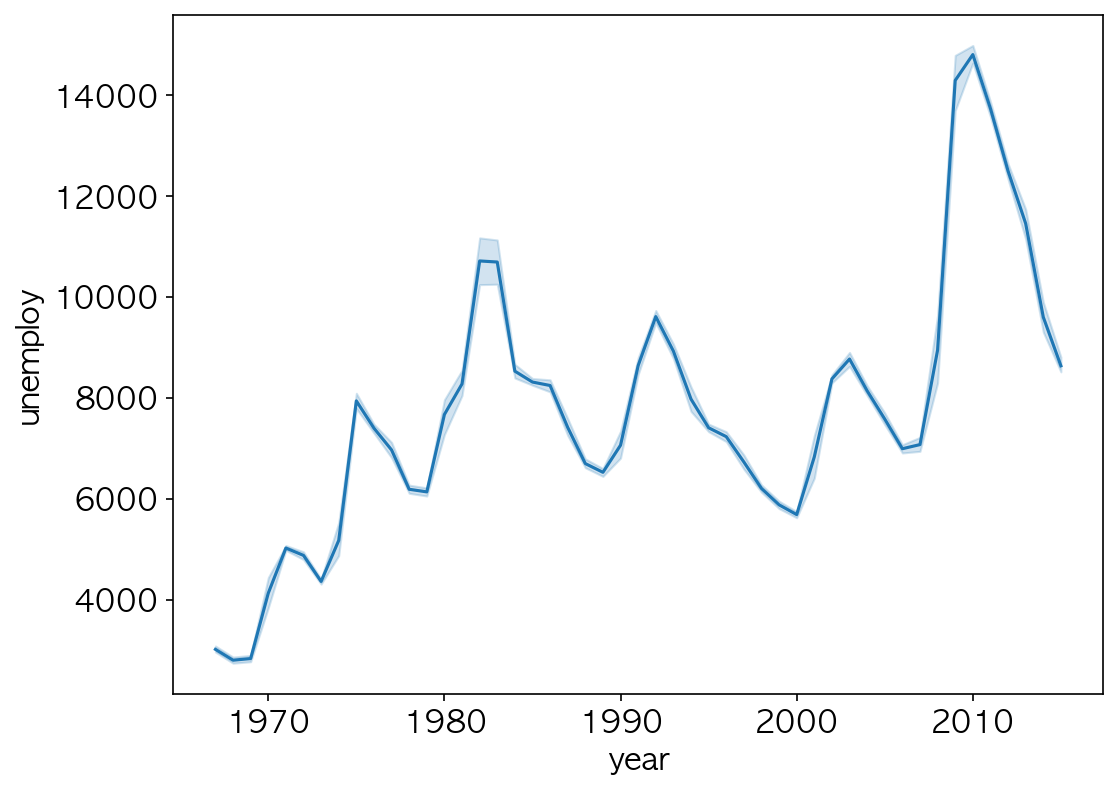

In [72]:
#x축에 연도 표시
sns.lineplot(data=economics, x='year',y='unemploy')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

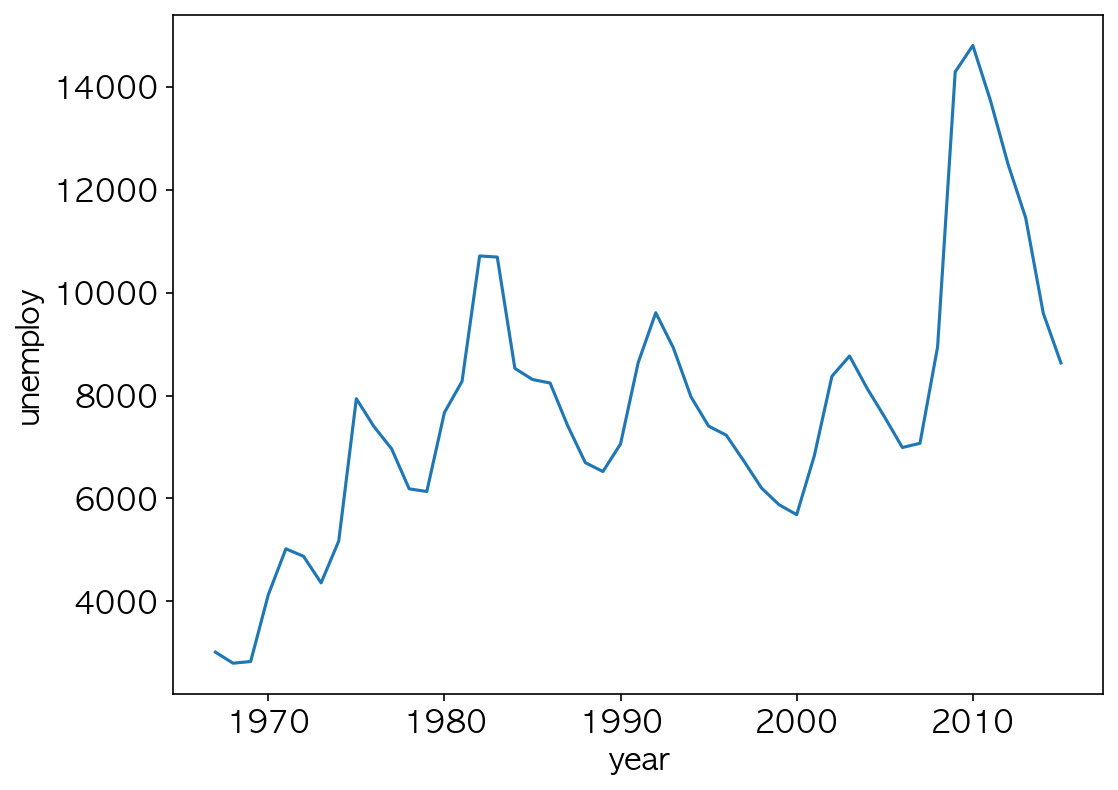

In [73]:
#선의 위아래 표시된 면적-> 신뢰구간(confidence interval) 표시하지 않기
sns.lineplot(data=economics, x='year',y='unemploy',ci=None)

<AxesSubplot:xlabel='year', ylabel='psavert'>

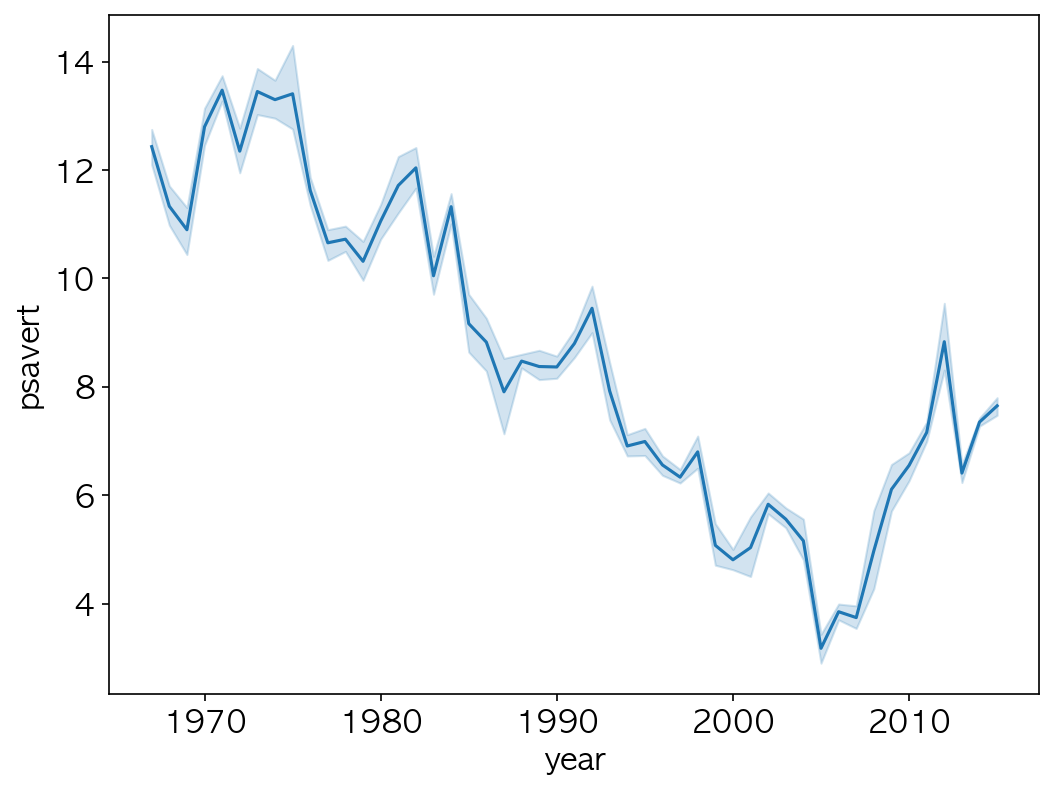

In [74]:
sns.lineplot(data=economics, x='year',y='psavert')

<AxesSubplot:xlabel='month', ylabel='psavert'>

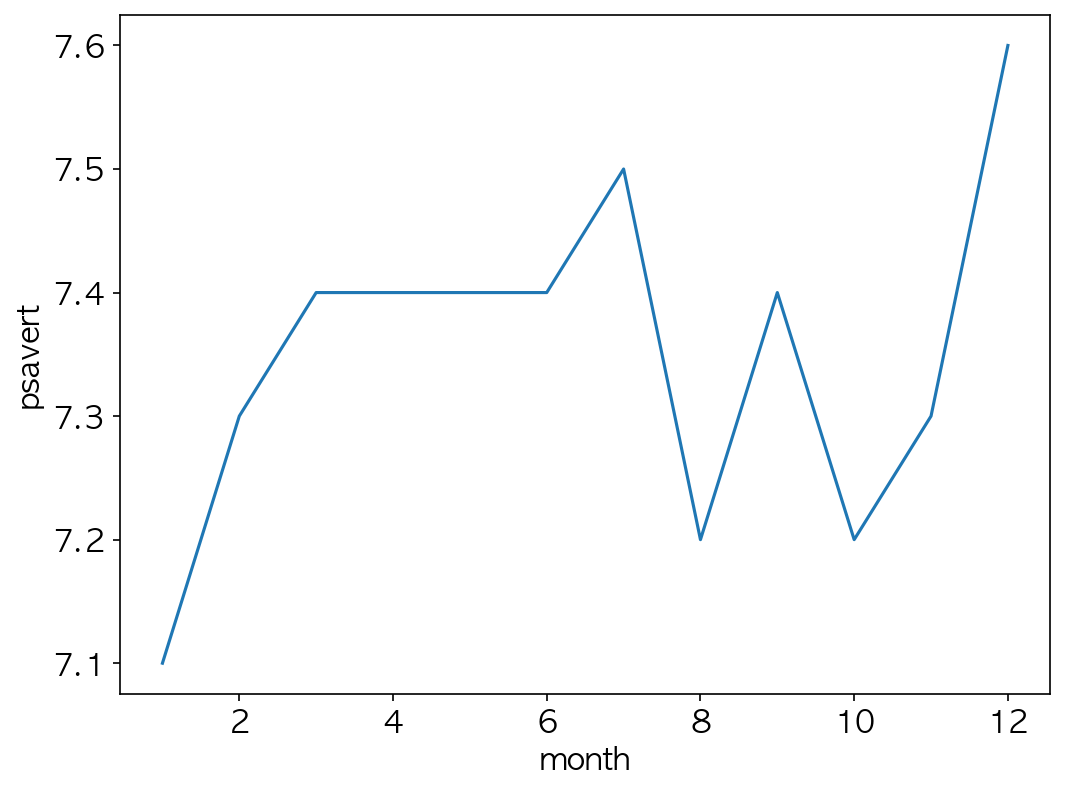

In [75]:
economics['month'] = economics['date2'].dt.month
data_2014 = economics.query("year==2014")
sns.lineplot(data=data_2014,x="month",y='psavert')

<AxesSubplot:xlabel='drv', ylabel='hwy'>

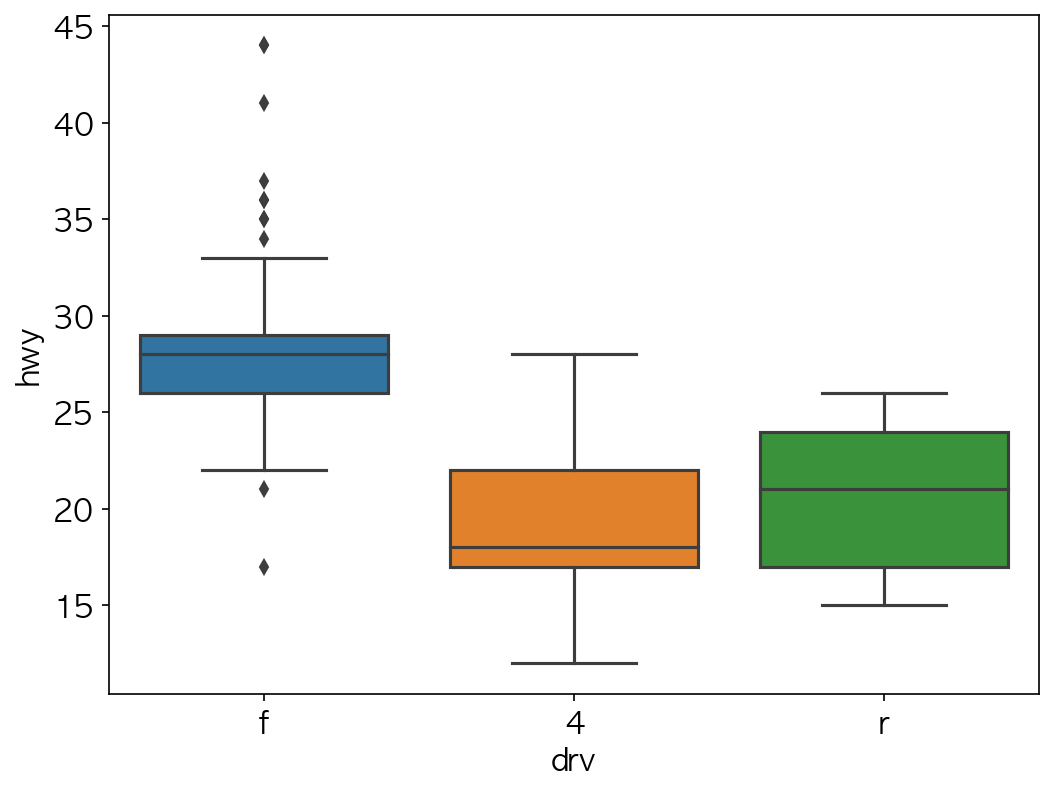

In [76]:
#box plot 만들기
# 데이터의 분포 또는 퍼져있는 형태를 직사각형 상자 모양으로 표현한 그래프

sns.boxplot(data=mpg, x='drv',y='hwy')

<AxesSubplot:xlabel='category', ylabel='cty'>

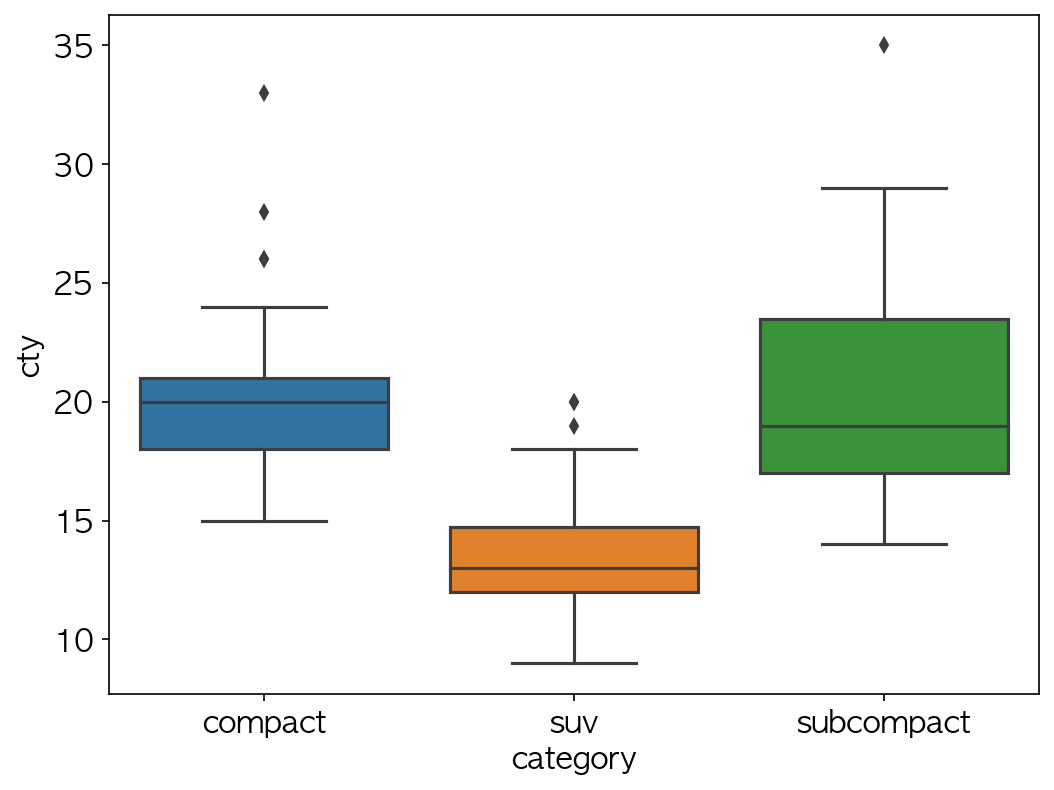

In [84]:
mpg_category = mpg.query("category=='compact' | category=='subcompact'| category=='suv'")
sns.boxplot(data=mpg_category, x='category',y='cty')

#mpg.query('category in ["compact","subcompact","suv"]')